<a href="https://colab.research.google.com/github/DonaldTurton/AT2_Advanced_Data_Algorithms/blob/master/AT2_GetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Predicting Energy Prices

In [0]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Correlation plot
from google.colab import files

# Libraries for XGBOOST
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer


In [90]:
# Read csv
url = 'https://raw.githubusercontent.com/DonaldTurton/AT2_Advanced_Data_Algorithms/master/2018_19_final_data.csv'
data = pd.read_csv(url)
data.head()

,REGION,Year.x,Month,Day,TOTALDEMAND,RRP,PERIODTYPE,date_keep,Product.code.x,Bureau.of.Meteorology.station.number.x,Year.y,Daily.global.solar.exposure..MJ.m.m.,Product.code.y,Bureau.of.Meteorology.station.number.y,Year.x.x,Maximum.temperature..Degree.C.,Days.of.accumulation.of.maximum.temperature,Quality.x,Product.code.x.x,Bureau.of.Meteorology.station.number.x.x,Year.y.y,Minimum.temperature..Degree.C.,Days.of.accumulation.of.minimum.temperature,Quality.y,Product.code.y.y,Bureau.of.Meteorology.station.number.y.y,Year,Rainfall.amount..millimetres.,Period.over.which.rainfall.was.measured..days.,Quality,index,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NSW1,2018,1,1,6912.25,91.86,TRADE,1/01/2018,IDCJAC0016,66024,2018,31.0,IDCJAC0010,66037,2018,28.3,1,N,IDCJAC0011,66037,2018,20.8,1,N,IDCJAC0009,66037,2018,0.0,1.0,N,1,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW1,2018,1,1,6745.63,88.83,TRADE,1/01/2018,IDCJAC0016,66024,2018,31.0,IDCJAC0010,66037,2018,28.3,1,N,IDCJAC0011,66037,2018,20.8,1,N,IDCJAC0009,66037,2018,0.0,1.0,N,2,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW1,2018,1,1,6466.06,73.62,TRADE,1/01/2018,IDCJAC0016,66024,2018,31.0,IDCJAC0010,66037,2018,28.3,1,N,IDCJAC0011,66037,2018,20.8,1,N,IDCJAC0009,66037,2018,0.0,1.0,N,3,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW1,2018,1,1,6279.80,71.49,TRADE,1/01/2018,IDCJAC0016,66024,2018,31.0,IDCJAC0010,66037,2018,28.3,1,N,IDCJAC0011,66037,2018,20.8,1,N,IDCJAC0009,66037,2018,0.0,1.0,N,4,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW1,2018,1,1,6177.31,69.27,TRADE,1/01/2018,IDCJAC0016,66024,2018,31.0,IDCJAC0010,66037,2018,28.3,1,N,IDCJAC0011,66037,2018,20.8,1,N,IDCJAC0009,66037,2018,0.0,1.0,N,5,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Exploring the data set
data.shape   #28280Obs 28var


(28080, 37)

In [92]:
# Data Set Selection  
data = data.loc[:, ["RRP", "TOTALDEMAND", "Month", "Day", "time", "Maximum.temperature..Degree.C.", "Minimum.temperature..Degree.C.", "Rainfall.amount..millimetres.", "Daily.global.solar.exposure..MJ.m.m."]]
#month, day, demand, maxtemp, mintemp, rainfall, solarexpo, timeofday
data.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,RRP,TOTALDEMAND,Month,Day,time,Maximum.temperature..Degree.C.,Minimum.temperature..Degree.C.,Rainfall.amount..millimetres.,Daily.global.solar.exposure..MJ.m.m.
0,91.86,6912.25,1,1,NaN,28.3,20.8,0.0,31.0
1,88.83,6745.63,1,1,NaN,28.3,20.8,0.0,31.0
2,73.62,6466.06,1,1,NaN,28.3,20.8,0.0,31.0
3,71.49,6279.80,1,1,NaN,28.3,20.8,0.0,31.0
4,69.27,6177.31,1,1,NaN,28.3,20.8,0.0,31.0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28280 entries, 0 to 28279
Data columns (total 9 columns):
RRP                                     28223 non-null float64
TOTALDEMAND                             28223 non-null float64
Month                                   28280 non-null int64
Day                                     28280 non-null int64
time                                    28280 non-null object
Maximum.temperature..Degree.C.          27696 non-null float64
Minimum.temperature..Degree.C.          27648 non-null float64
Rainfall.amount..millimetres.           27696 non-null float64
Daily.global.solar.exposure..MJ.m.m.    27696 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.9+ MB


In [71]:
data.describe()
#MAX DAY 2019???
#MAC PRICE 4631??

,RRP,TOTALDEMAND,Month,Day,Maximum.temperature..Degree.C.,Minimum.temperature..Degree.C.,Rainfall.amount..millimetres.,Daily.global.solar.exposure..MJ.m.m.
count,28223.000000,28223.000000,28280.000000,28280.000000,27696.000000,27648.000000,27696.000000,27696.000000
mean,84.265707,8083.738118,5.654562,57.065877,24.088959,14.986241,2.406983,16.021714
std,58.661135,1236.545692,3.218267,285.016871,5.379311,4.938400,7.057352,7.116626
min,2.980000,5552.230000,1.000000,1.000000,13.800000,4.200000,0.000000,1.700000
25%,62.285000,7190.075000,3.000000,8.000000,20.200000,10.700000,0.000000,10.900000
50%,74.890000,7998.070000,5.000000,16.000000,23.500000,15.300000,0.000000,14.100000
75%,94.780000,8792.755000,8.000000,24.000000,27.800000,19.200000,0.800000,20.900000
max,4631.980000,13700.900000,12.000000,2019.000000,43.700000,23.800000,68.400000,32.100000


In [72]:
#Find Null values 
data.isnull().sum()

RRP                                      57
TOTALDEMAND                              57
Month                                     0
Day                                       0
time                                      0
Maximum.temperature..Degree.C.          584
Minimum.temperature..Degree.C.          632
Rainfall.amount..millimetres.           584
Daily.global.solar.exposure..MJ.m.m.    584
dtype: int64

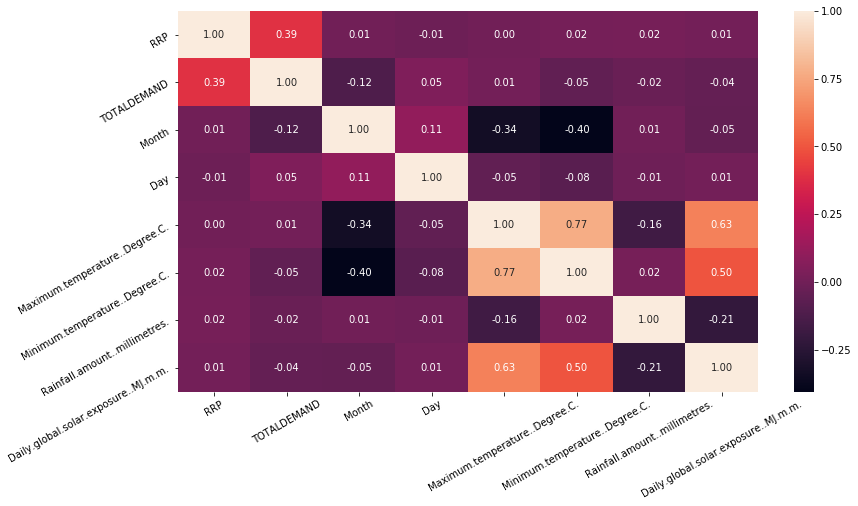

In [73]:
corr = data.corr()
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30) 
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30) 
plt.show()

# XG Boost (First Attempt)

In [0]:
#Drops Na
data.dropna(axis=0, subset=['RRP'], inplace=True)

In [75]:
#Chek 
data.isnull().sum()

RRP                                       0
TOTALDEMAND                               0
Month                                     0
Day                                       0
time                                      0
Maximum.temperature..Degree.C.          527
Minimum.temperature..Degree.C.          575
Rainfall.amount..millimetres.           527
Daily.global.solar.exposure..MJ.m.m.    527
dtype: int64

In [76]:
# Data partition
y = data.RRP
X = data.drop(['RRP'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
#Imputer
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [78]:
# Build model
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

[04:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [79]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 16.017749864487424


In [89]:
Plot trend
#Pred_Test= (predictions, test_y)

#plt.plot(Pred_Test)
#plt.show()

IndexError: ignored

In [87]:
print(Pred_Test)

(array([76.28308, 91.89916, 58.30169, ..., 71.07212, 62.65617, 99.35309],
      dtype=float32), array([ 66.65,  68.83,  58.19, ...,  42.15,  72.72, 150.25]))


In [0]:
plt.plot(Pred_Test)
plt.show()